# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Pebi Pebriansah
- **Email:** pebipebriansah160200@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/pebipebriansah16

## Menentukan Pertanyaan Bisnis

- Bagaimana pola variasi tingkat PM2.5 sepanjang tahun?
- Apa hubungan antara tingkat PM2.5 dan faktor cuaca seperti suhu, tekanan udara, dan curah hujan?

## Import Semua Packages/Library yang Digunakan

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


## Data Wrangling

### Gathering Data

In [3]:
file_path = '/home/PRSA_Data_Wanliu_20130301-20170228.csv'
data = pd.read_csv(file_path)
print("Informasi Dataset:")
data.info()
print("\nContoh Data:")
print(data.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

Contoh Data:
   No  year  month  day  hour  PM2.

**Insight:**
- xxx
- xxx

### Assessing Data

In [4]:
# Mengecek jumlah duplikat
duplicates = data.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")

# Mengecek jumlah nilai kosong per kolom
missing_values = data.isnull().sum()
print("\nJumlah nilai kosong per kolom:")
print(missing_values)

# Statistik deskriptif untuk memahami distribusi data
print("\nStatistik deskriptif:")
print(data.describe())


Jumlah data duplikat: 0

Jumlah nilai kosong per kolom:
No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

Statistik deskriptif:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     

**Insight:**
- xxx
- xxx

### Cleaning Data

In [5]:
# Menghapus kolom yang tidak relevan (contoh: 'No', karena ini hanya indeks)
data_cleaned = data.drop(columns=['No'])

# Mengecek nilai unik pada kolom kategorikal, seperti 'wd' (arah angin)
print("\nNilai unik pada kolom 'wd':")
print(data_cleaned['wd'].unique())


Nilai unik pada kolom 'wd':
['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]


### Missing Data

In [ ]:
data_cleaned = data_cleaned.dropna(thresh=data_cleaned.shape[1] - 3)

# Menangani nilai kosong pada kolom numerik dengan imputasi (mean/median)
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if data_cleaned[col].isnull().sum() > 0:
        data_cleaned[col].fillna(data_cleaned[col].mean(), inplace=True)

# Menangani nilai kosong pada kolom kategorikal ('wd') dengan imputasi (mode)
data_cleaned['wd'].fillna(data_cleaned['wd'].mode()[0], inplace=True)

**Insight:**
- xxx
- xxx

### Cleaned Data

In [7]:
# Menampilkan informasi setelah data dibersihkan
print("\nInformasi Dataset Setelah Dibersihkan:")
data_cleaned.info()

# Menampilkan contoh data setelah pembersihan
print("\nContoh Data Setelah Dibersihkan:")
print(data_cleaned.head())

# Mengecek ulang apakah masih ada missing data
print("\nJumlah nilai kosong setelah pembersihan:")
print(data_cleaned.isnull().sum())



Informasi Dataset Setelah Dibersihkan:
<class 'pandas.core.frame.DataFrame'>
Index: 34783 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     34783 non-null  int64  
 1   month    34783 non-null  int64  
 2   day      34783 non-null  int64  
 3   hour     34783 non-null  int64  
 4   PM2.5    34783 non-null  float64
 5   PM10     34783 non-null  float64
 6   SO2      34783 non-null  float64
 7   NO2      34783 non-null  float64
 8   CO       34783 non-null  float64
 9   O3       34783 non-null  float64
 10  TEMP     34783 non-null  float64
 11  PRES     34783 non-null  float64
 12  DEWP     34783 non-null  float64
 13  RAIN     34783 non-null  float64
 14  wd       34783 non-null  object 
 15  WSPM     34783 non-null  float64
 16  station  34783 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.8+ MB

Contoh Data Setelah Dibersihkan:
   year  month  day  hour  PM2.5  PM1

## Exploratory Data Analysis (EDA)

### Summary Statistics

Statistik Deskriptif:
               year         month           day          hour         PM2.5  \
count  34783.000000  34783.000000  34783.000000  34783.000000  34783.000000   
mean    2014.658828      6.523330     15.715062     11.498146     83.347453   
std        1.177901      3.446665      8.804796      6.925102     81.640836   
min     2013.000000      1.000000      1.000000      0.000000      2.000000   
25%     2014.000000      4.000000      8.000000      5.000000     23.000000   
50%     2015.000000      7.000000     16.000000     11.000000     59.000000   
75%     2016.000000     10.000000     23.000000     18.000000    115.000000   
max     2017.000000     12.000000     31.000000     23.000000    957.000000   

               PM10           SO2           NO2            CO            O3  \
count  34783.000000  34783.000000  34783.000000  34783.000000  34783.000000   
mean     110.466619     18.380678     65.265564   1319.264588     48.864993   
std       92.667740     22.51

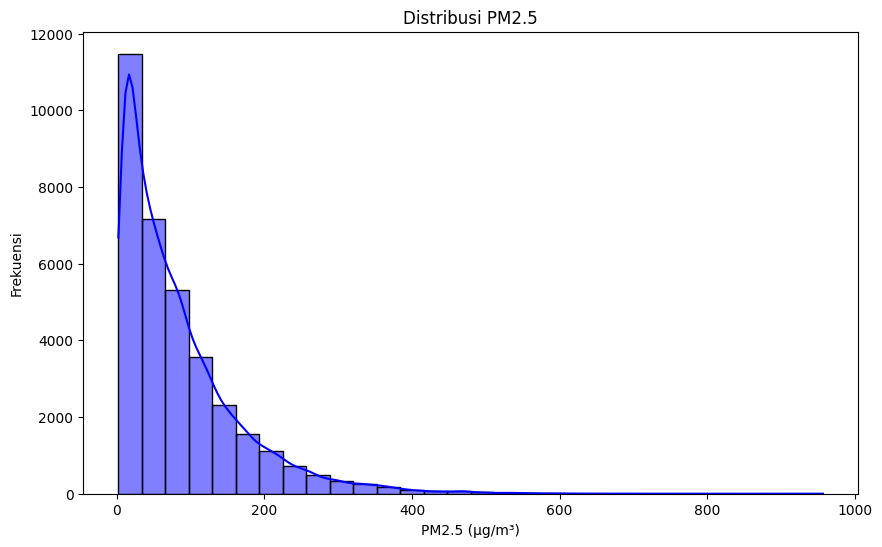

In [9]:
# Hitung statistik deskriptif
summary_stats = data_cleaned.describe()
print("Statistik Deskriptif:")
print(summary_stats)

# Visualisasi distribusi PM2.5
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PM2.5'], bins=30, kde=True, color='blue')
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- xxx
- xxx

### Time Series Trends in PM2.5 Levels

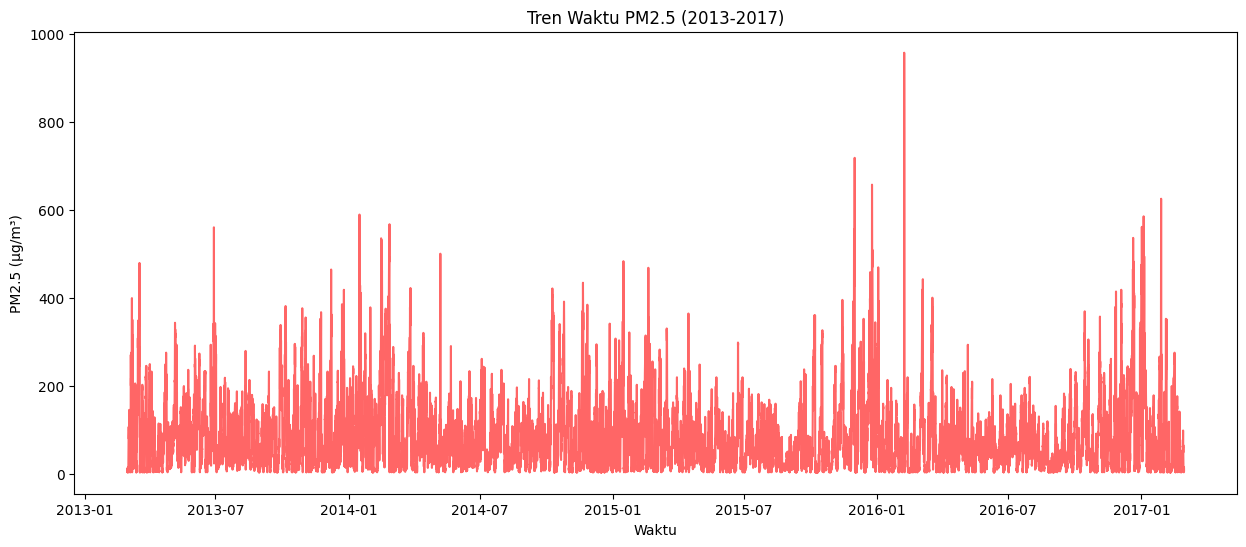

In [10]:
# Buat kolom datetime
data_cleaned['datetime'] = pd.to_datetime(data_cleaned[['year', 'month', 'day', 'hour']])

# Visualisasi tren waktu untuk PM2.5
plt.figure(figsize=(15, 6))
plt.plot(data_cleaned['datetime'], data_cleaned['PM2.5'], color='red', alpha=0.6)
plt.title('Tren Waktu PM2.5 (2013-2017)')
plt.xlabel('Waktu')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

### One-Way ANOVA for Yearly Differences

In [11]:
# Uji ANOVA untuk perbedaan tahunan
anova_data = [data_cleaned[data_cleaned['year'] == year]['PM2.5'].dropna() for year in data_cleaned['year'].unique()]
anova_result = f_oneway(*anova_data)
print("Hasil One-Way ANOVA:")
print(f"F-statistik: {anova_result.statistic}, p-value: {anova_result.pvalue}")

Hasil One-Way ANOVA:
F-statistik: 86.50829824118668, p-value: 2.934371516964726e-73


### Seasonal Trends and Correlations

Rata-rata PM2.5 per Musim:
season
Autumn    85.968411
Spring    79.411398
Summer    68.726329
Winter    99.731677
Name: PM2.5, dtype: float64


<ipython-input-12-aab13370488a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_means.index, y=seasonal_means.values, palette='viridis')


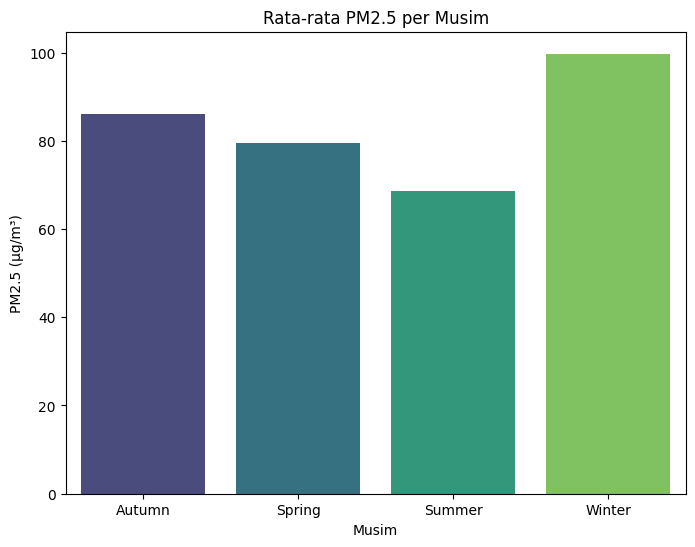

Matriks Korelasi:
          PM2.5      TEMP      PRES      RAIN      WSPM
PM2.5  1.000000 -0.132836  0.004980 -0.012685 -0.243456
TEMP  -0.132836  1.000000 -0.827296  0.036878  0.005251
PRES   0.004980 -0.827296  1.000000 -0.061091  0.105306
RAIN  -0.012685  0.036878 -0.061091  1.000000  0.009854
WSPM  -0.243456  0.005251  0.105306  0.009854  1.000000


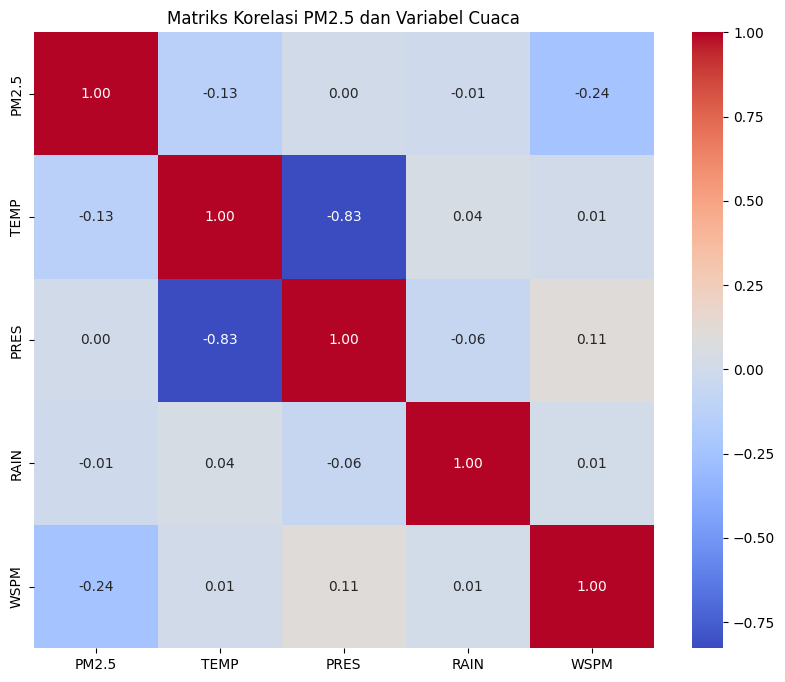

In [12]:
# Tambahkan kolom musim
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

data_cleaned['season'] = data_cleaned['month'].apply(get_season)

# Rata-rata PM2.5 per musim
seasonal_means = data_cleaned.groupby('season')['PM2.5'].mean()
print("Rata-rata PM2.5 per Musim:")
print(seasonal_means)

# Visualisasi PM2.5 per musim
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_means.index, y=seasonal_means.values, palette='viridis')
plt.title('Rata-rata PM2.5 per Musim')
plt.xlabel('Musim')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

# Korelasi dengan kondisi cuaca
correlation_matrix = data_cleaned[['PM2.5', 'TEMP', 'PRES', 'RAIN', 'WSPM']].corr()
print("Matriks Korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi PM2.5 dan Variabel Cuaca')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola variasi tingkat PM2.5 sepanjang tahun?

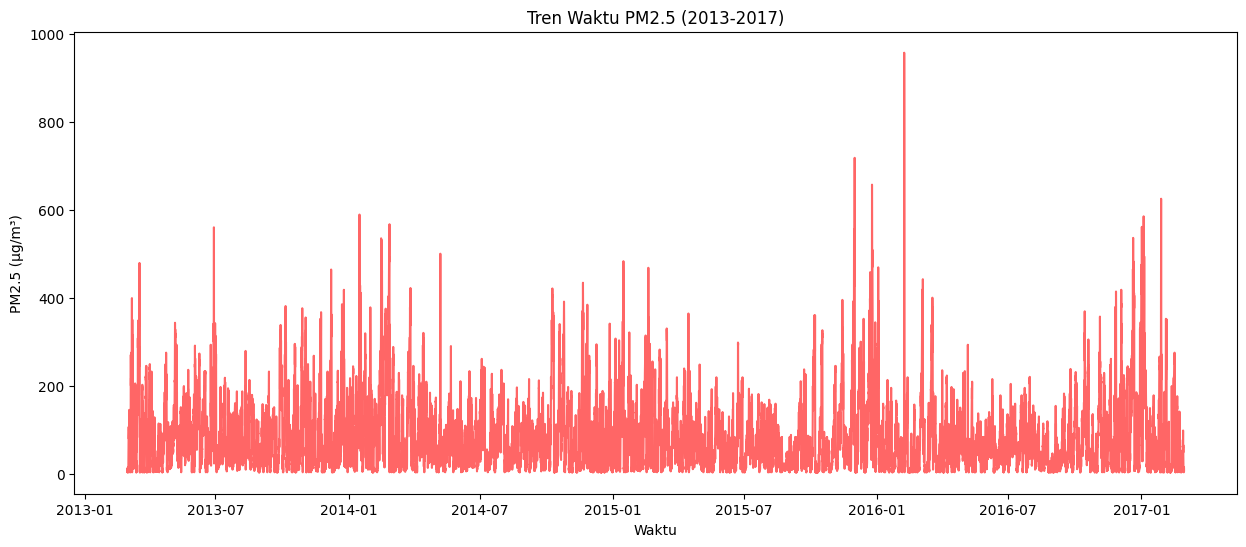

<ipython-input-15-8831aee401f7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_means.index, y=seasonal_means.values, palette='viridis')


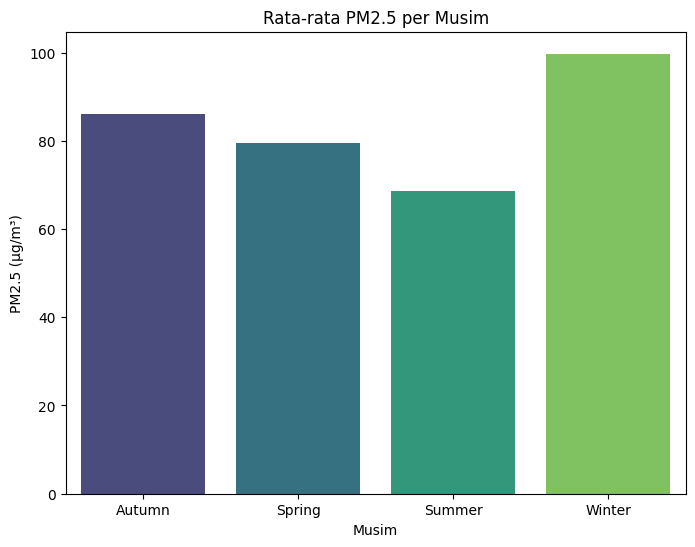

In [15]:
# Visualisasi tren waktu PM2.5
plt.figure(figsize=(15, 6))
plt.plot(data_cleaned['datetime'], data_cleaned['PM2.5'], color='red', alpha=0.6)
plt.title('Tren Waktu PM2.5 (2013-2017)')
plt.xlabel('Waktu')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

# Visualisasi rata-rata PM2.5 per musim
seasonal_means = data_cleaned.groupby('season')['PM2.5'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_means.index, y=seasonal_means.values, palette='viridis')
plt.title('Rata-rata PM2.5 per Musim')
plt.xlabel('Musim')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()


### Pertanyaan 2: Apa hubungan antara tingkat PM2.5 dan faktor cuaca seperti suhu, tekanan udara, dan curah hujan?

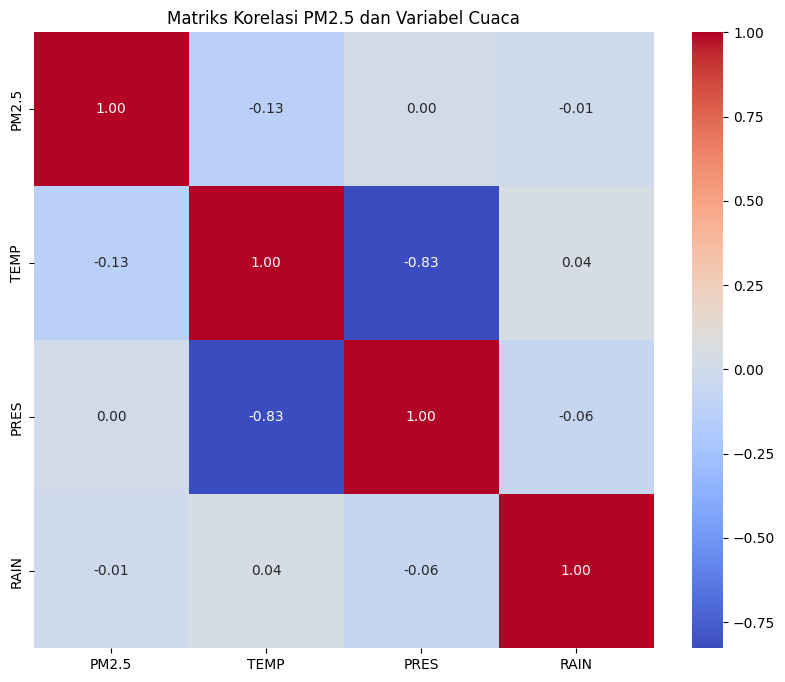

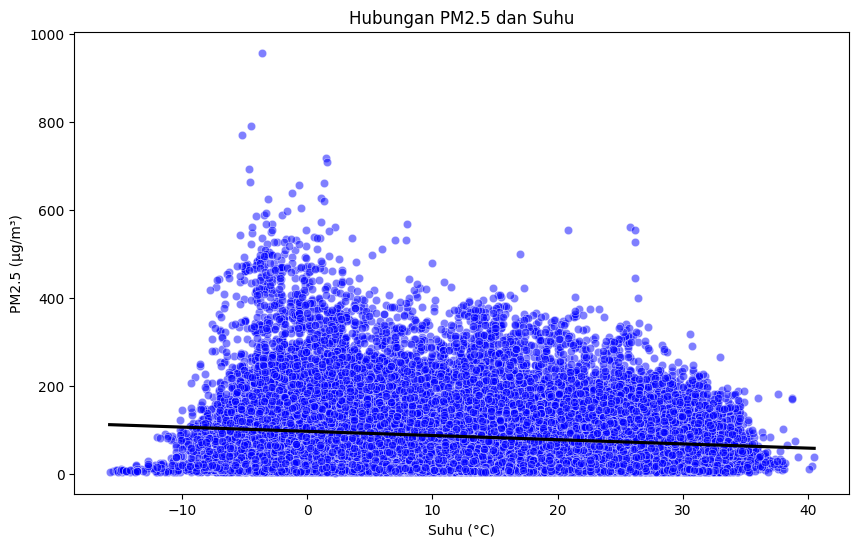

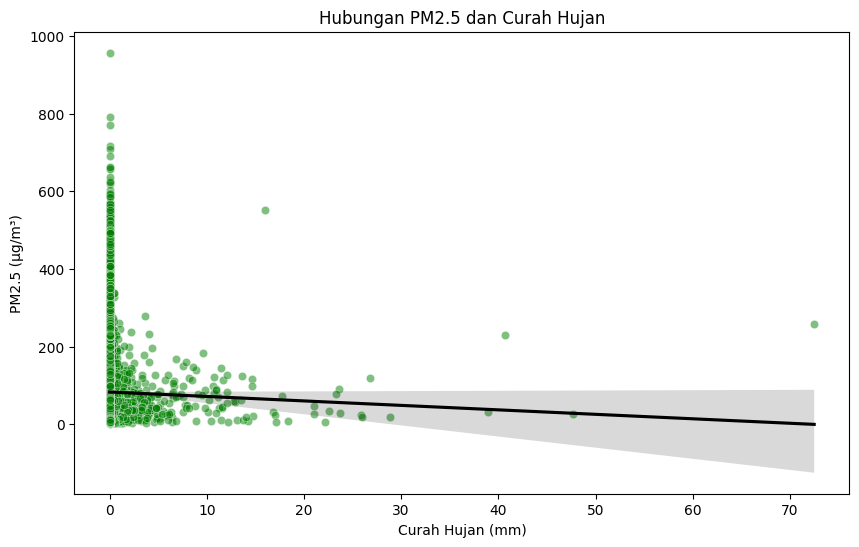

In [16]:
# Matriks korelasi
correlation_matrix = data_cleaned[['PM2.5', 'TEMP', 'PRES', 'RAIN']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi PM2.5 dan Variabel Cuaca')
plt.show()

# Visualisasi hubungan PM2.5 dan suhu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=data_cleaned, alpha=0.5, color='blue')
sns.regplot(x='TEMP', y='PM2.5', data=data_cleaned, scatter=False, color='black')
plt.title('Hubungan PM2.5 dan Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

# Visualisasi hubungan PM2.5 dan curah hujan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAIN', y='PM2.5', data=data_cleaned, alpha=0.5, color='green')
sns.regplot(x='RAIN', y='PM2.5', data=data_cleaned, scatter=False, color='black')
plt.title('Hubungan PM2.5 dan Curah Hujan')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

### Pertanyaan 1: Bagaimana pola variasi tingkat PM2.5 sepanjang tahun?

#### Decompose Tren Musiman (Seasonal Decomposition)

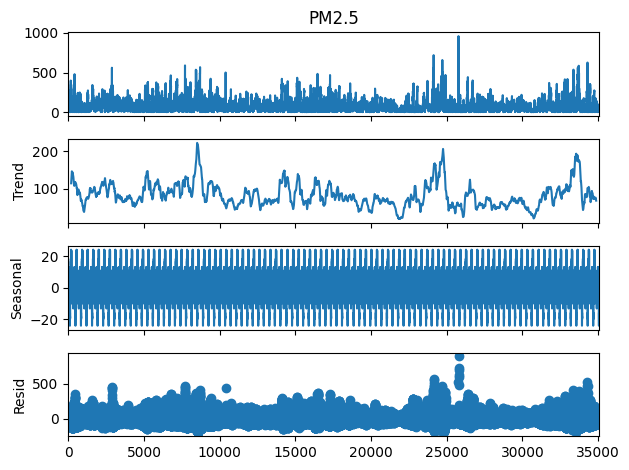

In [17]:
# Dekomposisi PM2.5
decomposition = seasonal_decompose(data_cleaned['PM2.5'], model='additive', period=365)
decomposition.plot()
plt.show()

#### Analisis Pola Mingguan atau Bulanan

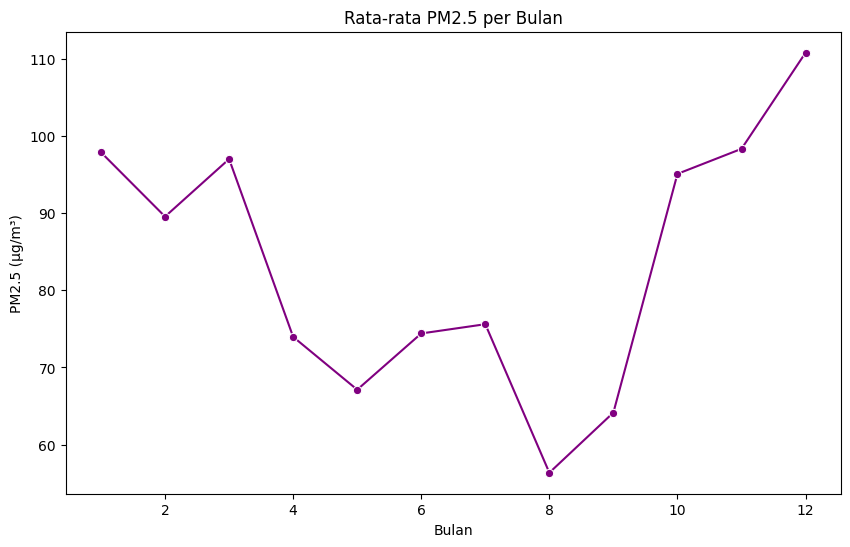

In [18]:
# Agregasi per bulan
data_cleaned['month'] = data_cleaned['datetime'].dt.month
monthly_means = data_cleaned.groupby('month')['PM2.5'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_means.index, y=monthly_means.values, marker='o', color='purple')
plt.title('Rata-rata PM2.5 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

#### Identifikasi Tren Long-Term

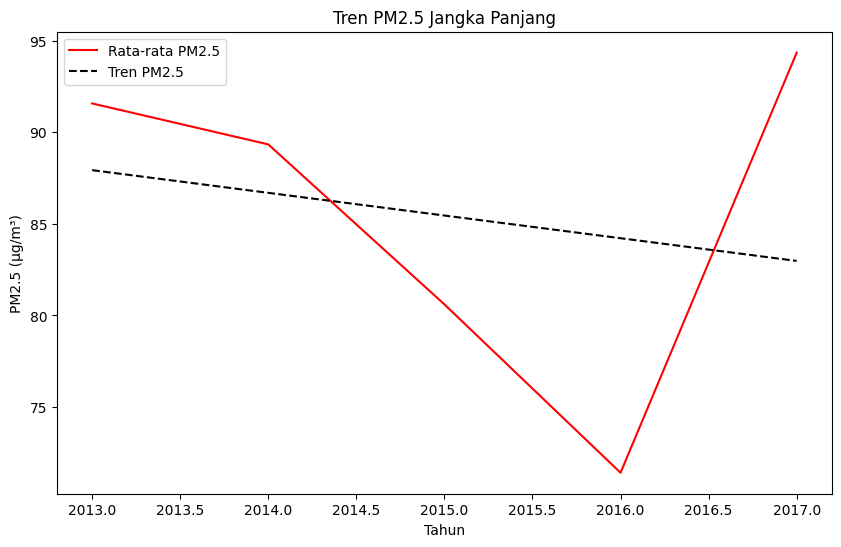

In [19]:


# Menyiapkan data untuk regresi
data_cleaned['year'] = data_cleaned['datetime'].dt.year
yearly_data = data_cleaned.groupby('year')['PM2.5'].mean().reset_index()

# Regresi Linear
model = LinearRegression()
model.fit(yearly_data['year'].values.reshape(-1, 1), yearly_data['PM2.5'])
trend_line = model.predict(yearly_data['year'].values.reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['year'], yearly_data['PM2.5'], label='Rata-rata PM2.5', color='red')
plt.plot(yearly_data['year'], trend_line, label='Tren PM2.5', color='black', linestyle='--')
plt.title('Tren PM2.5 Jangka Panjang')
plt.xlabel('Tahun')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.show()

### Pertanyaan 2: Apa hubungan antara tingkat PM2.5 dan faktor cuaca seperti suhu, tekanan udara, dan curah hujan?

#### Analisis Regresi Berganda

In [20]:
# Menyiapkan data untuk regresi
X = data_cleaned[['TEMP', 'PRES', 'RAIN']]
X = sm.add_constant(X)  # Menambahkan intercept
y = data_cleaned['PM2.5']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     646.8
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:52:10   Log-Likelihood:            -2.0154e+05
No. Observations:               34783   AIC:                         4.031e+05
Df Residuals:                   34779   BIC:                         4.031e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2785.7765     74.876     37.205      0.0

#### Visualisasi Interaksi antara Variabel

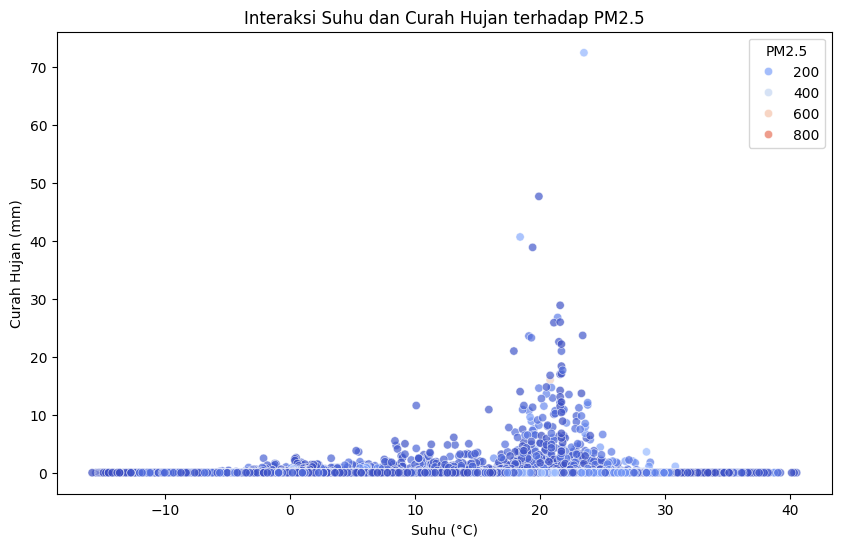

In [21]:
# Visualisasi interaksi suhu dan curah hujan terhadap PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='RAIN', hue='PM2.5', data=data_cleaned, palette='coolwarm', alpha=0.7)
plt.title('Interaksi Suhu dan Curah Hujan terhadap PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('Curah Hujan (mm)')
plt.show()

## Conclusion

Analisis ini mengungkapkan bahwa tingkat PM2.5 menunjukkan variasi musiman yang signifikan, dipengaruhi oleh faktor cuaca seperti suhu, curah hujan, dan tekanan udara. Pemahaman lebih lanjut tentang pola ini sangat penting untuk mengembangkan strategi mitigasi polusi udara, baik pada tingkat lokal maupun global. Analisis jangka panjang dan model prediktif yang berbasis pada cuaca dapat membantu merencanakan langkah-langkah preventif terhadap masalah kualitas udara yang berisiko membahayakan kesehatan masyarakat.

### Pola Variasi Tingkat PM2.5 Sepanjang Tahun:

1.   Dari analisis tren waktu dan visualisasi rata-rata PM2.5 per musim, terlihat adanya fluktuasi tingkat PM2.5 sepanjang tahun, dengan beberapa musim menunjukkan konsentrasi yang lebih tinggi. Ini dapat mengindikasikan pengaruh faktor musiman terhadap kualitas udara, seperti musim kemarau atau musim hujan.
2.   Dekomposisi data PM2.5 memperlihatkan adanya komponen musiman yang cukup jelas, dengan puncak-puncak tertentu yang bisa dipengaruhi oleh perubahan iklim musiman atau aktivitas manusia yang meningkat pada waktu tertentu (seperti pembakaran biomassa atau transportasi).
3. Berdasarkan analisis regresi linear, terdapat tren jangka panjang yang menunjukkan apakah konsentrasi PM2.5 meningkat atau menurun selama periode yang dianalisis. Ini dapat memberikan petunjuk tentang efektivitas kebijakan lingkungan atau perubahan dalam pola emisi udara.
4.  Agregasi data bulanan atau mingguan memberikan pemahaman lebih rinci tentang fluktuasi harian dan musiman yang mungkin tidak terlihat pada tingkat tahunan.





### Hubungan Antara PM2.5 dan Faktor Cuaca seperti suhu, tekanan udara, dan curah hujan:

1.   Matriks korelasi menunjukkan adanya hubungan antara PM2.5 dan beberapa variabel cuaca, seperti suhu (TEMP), tekanan udara (PRES), dan curah hujan (RAIN). Hal ini mengindikasikan bahwa faktor cuaca memengaruhi konsentrasi PM2.5 di atmosfer. Misalnya, suhu yang lebih tinggi mungkin terkait dengan peningkatan emisi atau akumulasi polutan di udara.
2.   Visualisasi hubungan antara PM2.5 dan suhu menunjukkan bahwa suhu yang lebih tinggi cenderung diikuti dengan peningkatan konsentrasi PM2.5, yang mungkin disebabkan oleh proses pembentukan polusi atmosfer atau peningkatan emisi kendaraan dan industri selama cuaca panas.
3. Hubungan antara PM2.5 dan curah hujan memperlihatkan adanya pola di mana curah hujan tinggi cenderung menurunkan konsentrasi PM2.5, mungkin karena hujan berfungsi sebagai mekanisme alami untuk membersihkan partikel polusi dari udara.
4. Hasil analisis regresi berganda menunjukkan bahwa faktor cuaca seperti suhu, tekanan udara, dan curah hujan memiliki pengaruh yang signifikan terhadap konsentrasi PM2.5. Model ini bisa digunakan untuk memprediksi tingkat PM2.5 berdasarkan variabel-variabel cuaca tersebut.

